In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import load_data
import generate_features
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = load_data.load_data()
data_features, _ = generate_features.generate_features(data, None)
valid_date_block = data['date_block_num'].max()
train_idx = data['date_block_num'] < valid_date_block
val_idx = data['date_block_num'] == valid_date_block
good_dates_mask = data['date_block_num'] > 12

X = data_features[train_idx & good_dates_mask]
Y = data['item_cnt_month'][train_idx & good_dates_mask]
X_val = data_features[val_idx]
Y_val = data['item_cnt_month'][val_idx]


/home/red-haired/programming/kaggle_sales/generate_features.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_val[new_col_name] = X_val[col].map(means)


In [9]:
params = {'n_estimators':100, 'max_depth':15, 'min_samples_leaf':4, 'random_state':1}
from train import train
reg = train(X, Y, params)

In [10]:
predictions = []
for tree in reg.estimators_:
    predictions.append(tree.predict(X_val)[None, :])

concatenate

In [11]:
predictions = np.vstack(predictions)

In [12]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None]

In [13]:
from sklearn.metrics import mean_squared_error
scores = []
for pred in cum_mean:
    scores.append(np.sqrt(mean_squared_error(Y_val, pred)))

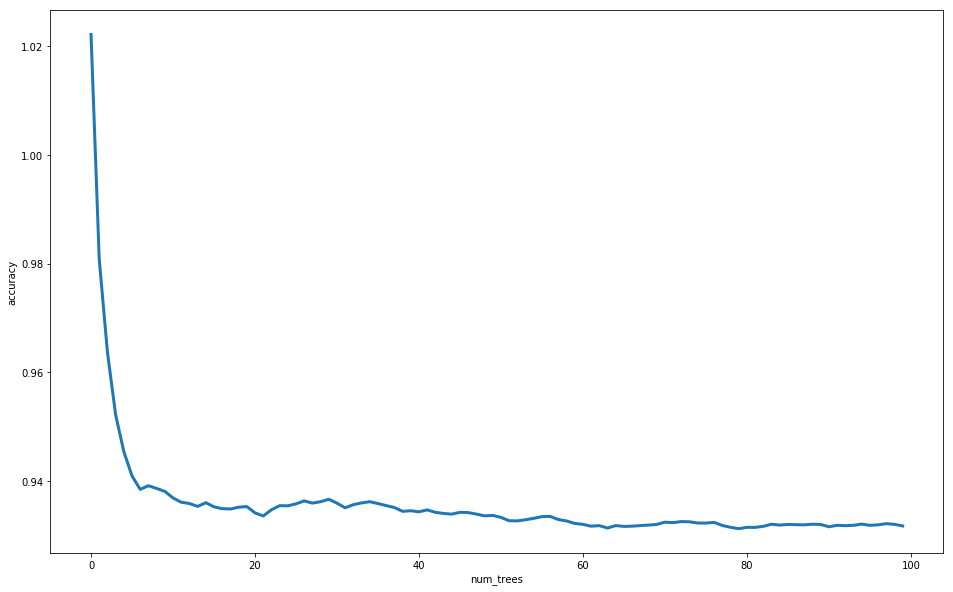

In [14]:
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');